<div style="background-color:#057BA3; padding:6px; color:#ffffff;">

## IUCAA Finesse Workshop 18-22nd Dec 2019
</div>


#### Objectives

This notebook is meant to provide some introduction to some more advanced topics in interferometer simulation. Those who have successfully completed the tasks in notebooks 10a, 10b and 11a can attempt these.

### Readout schemes

In practise, we use a device called a *photodiode* to record optical *powers* at various measurement ports of the interferometer. If an electric field $E$ (which in general is a complex quantity) is incident on the photodiode, the generated photocurrent is proportional to $EE* \equiv |E|^2$ (where the averaging of the optical frequency of 300 THz is implicit). This is generally a poor strategy in the context of measuring *small* signals. 

In our interferometers, we often rely on the beat between a *Local Oscilaltor* field, $E_{\mathrm{LO}}$, and the *Signal field*, $E_{\mathrm{sig}}$ to directly access the amplitude of an electric field (which is what encodes information about mirror motion). Conceptually, the purpose of $E_{\mathrm{LO}}$ is to *amplify* the small signal field we wish to measure. Mathematically, the photocurrent can be expressed as:

$$ i_{\mathrm{PD}} \propto (E_{\mathrm{LO}} + E_{\mathrm{sig}}) (E^*_{\mathrm{LO}} + E^*_{\mathrm{sig}}) \\ 
= |E_{\mathrm{LO}}|^2 + |E_{\mathrm{sig}}|^2 + E^*_{\mathrm{LO}}E_{\mathrm{sig}} + + E_{\mathrm{LO}}E^*_{\mathrm{sig}}.$$

The *ideal* Local Oscillator field has no time-dependent variations of its own. So the first term above is just a constant. For small signal fields, the second term is negligible compared to the third and fourth, as you shall simulate.

If the frequency of the field $E_{\mathrm{LO}}$ is equal to that of $E_{\mathrm{sig}}$ in the absence of any modulation, then the readout scheme is referred to as *homodyne* readout. If the frequency of $E_{\mathrm{LO}}$ is different from that of $E_{\mathrm{sig}}$ in the absence of any modulation, then the readout scheme is referred to as *heterodyne* readout. The tasks below walk you through these readout schemes - the numbers chosen are rather artificial, and are mainly to help you visualize these signals.


<div style="background-color:#cceffc;padding:10px;">
    
### Task: Simulating a Homodyne readout signal

 1. Assume a *real* signal field with amplitude $1 \, \sqrt{\mu \mathrm{W}}$ and frequency 100 Hz, and a frequency modulation with modulation depth of 10 Hz, and a modulation rate of 10 Hz. Make a suitable time vector and plot this signal.
 1. Assume a *real* local oscillator field with amplitude $1 \, \sqrt{\mathrm{W}}$, with frequency 100 Hz.
 1. Compute the last three terms in the above equation, and plot them.
 
#### Question: Which component(s) are dominant?

#### Question: What happens if the fields are complex-valued (as they generally are in interferometer problems)?

</div>

<div style="background-color:#cceffc;padding:10px;">
    
### Task: Simulating a Heterodyne readout signal

 1. Assume a *real* signal field with amplitude $1 \, \sqrt{\mu \mathrm{W}}$ and frequency 100 Hz, and a frequency modulation with modulation depth of 10 Hz. Make a suitable time vector and plot this signal.
 1. Assume a *real* local oscillator field with amplitude $1 \, \sqrt{\mathrm{W}}$, with frequency 1 kHz.
 1. Compute the last three terms in the derived equation for the photocurrent.
 1. We are only interested in the variations in the signal field. We can 'pick out' these variations by demodulating the computed terms at the local oscillator frequency, i.e. 1 kHz. The demodulation operation in practise is realized by multiplication by a sine-wave at 1 kHz, and low-pass filtering the output to reject the sum-frequency terms.
 
In the LIGO interferometers, both Heterodyne and Homodyne readouts are employed. The specific scheme used will depend on practical considerations of signal-to-noise ratio, which we will briefly look at in the afternoon session.

</div>

<div style="background-color:#cceffc;padding:10px;">

### Task (for those who fancy a challenge): Michelson response to phase modulated light

As you have learnt yesterday, it is often desirable to phase modulate the light incident on an interferometer, as we can use the spectral components to sense the lengths of various optical cavities in the interferometer. Specifically, for the Michelson  interferometer, we would like to set the instrument up in such a way that we can transmit an RF (radio-frequency) sideband to the dark-port of the Michelson, while keeping it dark for the carrier field. The following set of steps will allow you to work through this setup:

 1. Add a pair of RF PM sidebands (order=1) at $\Omega=11 \, \mathrm{MHz}$, with modulation depth 0.2 to the model you have set up.
 1. From Task 3, you know the tuning of ETMx that makes the dark-port dark. Now that you have added PM sidebands, how does the power of the sideband vary?
 1. What parameters do you have available to tune, such that *all* the RF sideband power is transmitted to the dark port, while it remains dark for the carrier? Make a plot showing this tuning.
 
This technique is critical to the control of LIGO-style Dual-Recycled Fabry-Pérot Michelson interferometer.


</div>


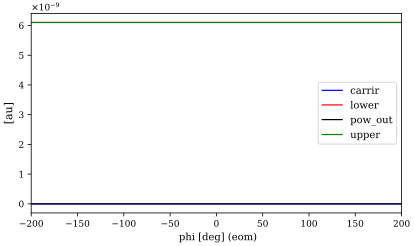

In [27]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting
from matplotlib.ticker import FormatStrFormatter

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)
base = finesse.kat()
base.verbose = False
#base.noxaxis= True

Mich = """
l laser1 1.0 0 n1 # laser with P = 1W at the default frequency
s smod 0 n1 nmod1
mod eom {f} 0.2 1 pm -90 nmod1 nmod2
s s0 0 nmod2 n2     # space connecting the laser to something
bs bs1 0.5 0.5 0 0 n2 n3 n4 n5 # 50:50 beam splitter
s Lx 1 n4 n8
s Ly 1 n3 n6
m ETMy 1 0 0 n6 n7
m ETMx 1 0 90 n8 n9 


pd pow_out n5
ad upper {f} n5
ad carrir 0 n5
ad lower -{f} n5
xaxis eom phi lin -200 200 500
""".format(f=11e6)
base.parse(Mich)
out=base.run()
out.plot()
#plt.plot(out.x,out['upper']**2+out['carrir']**2+out['lower']**2, ls='--',lw=2)
#plt.plot(out.x,out['pow_out'])